In [2]:
import sys
sys.path.append('../Lung segmentation/')
import os
from ct_reader import *
import improved_lung_segmentation
%pylab inline 
from skimage.transform import resize
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [3]:
def read_ct(path, ret_xy_spacing=False):
    patient = read_ct_scan(path)
    image = get_pixels_hu(patient)
    image[image == image[0,0,0]] = 0
    
    if ret_xy_spacing:
        try:
            return image, patient[0].PixelSpacing[0]
        except AttributeError:
            return image, patient.GetSpacing()[0]
    
    return image

In [4]:
patient = '/home/elvira/Projects/concept-to-clinic/LIDC-IDRI-0001/1.3.6.1.4.1.14519.5.2.1.6279.6001.298806137288633453246975630178/1.3.6.1.4.1.14519.5.2.1.6279.6001.179049373636438705059720603192'
patient, _ = read_ct(patient, True)
lung_segmentation, left, right, trachea = improved_lung_segmentation.improved_lung_segmentation(patient)

finding start slice
moving forward
moving backward


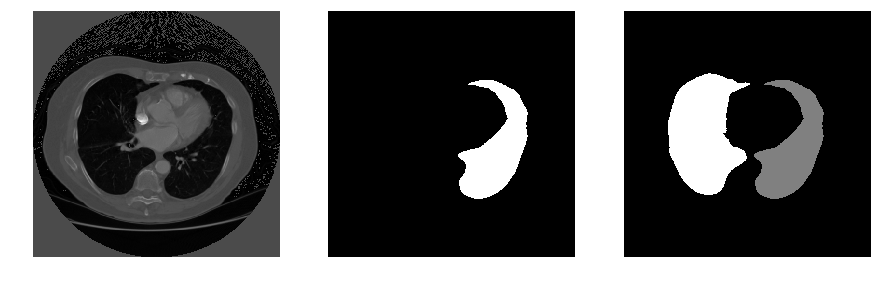

In [5]:
k = 63
plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(patient[k], 'gray');
plt.axis("off");

plt.subplot(132)
plt.imshow(left[k], 'gray');
plt.axis("off");

plt.subplot(133)
plt.imshow(lung_segmentation[k] + right[k], 'gray');
plt.axis("off");

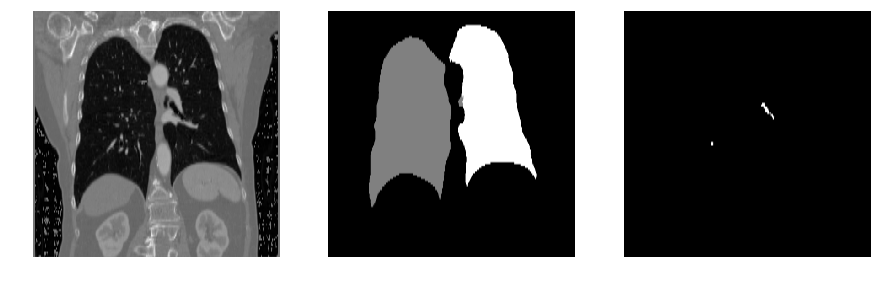

In [6]:
from skimage.transform import resize
m = 300

plt.figure(figsize=(15,15))

plt.subplot(131)
plt.imshow(resize(patient[:, m], (540, 540)), 'gray');
axis("off");

plt.subplot(132)
plt.imshow(resize(lung_segmentation[:, m] + left[:, m], (540, 540)), 'gray');
axis("off");

plt.subplot(133)
plt.imshow(resize(trachea[:, m], (540, 540)), 'gray');
axis("off");
